In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import make_pipeline

import ast
from category_encoders import WOEEncoder
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from sklearn.experimental import enable_hist_gradient_boosting 
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import gc
import tqdm
import matplotlib.pyplot as plt
gc.enable()

In [72]:
df = pd.read_csv('df_model.csv', )


In [73]:
df.drop_duplicates(inplace=True)

In [74]:
df.drop(1,inplace=True)

In [87]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123001 entries, 0 to 123000
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              123001 non-null  float64
 1   left_ht            108878 non-null  float64
 2   left_age           120706 non-null  float64
 3   left_ace           116841 non-null  float64
 4   left_df            116841 non-null  float64
 5   left_svpt          116841 non-null  float64
 6   left_1stIn         116841 non-null  float64
 7   left_1stWon        116841 non-null  float64
 8   left_2ndWon        116841 non-null  float64
 9   left_SvGms         116841 non-null  float64
 10  left_bpSaved       116841 non-null  float64
 11  left_bpFaced       116841 non-null  float64
 12  left_rank          119837 non-null  float64
 13  left_rank_points   119837 non-null  float64
 14  right_ht           108845 non-null  float64
 15  right_age          120698 non-null  float64
 16  ri

In [75]:
df.tail()

,Unnamed: 0,left_ht,left_age,left_ace,left_df,left_svpt,left_1stIn,left_1stWon,left_2ndWon,left_SvGms,left_bpSaved,left_bpFaced,left_rank,left_rank_points,right_ht,right_age,right_ace,right_df,right_svpt,right_1stIn,right_1stWon,right_2ndWon,right_SvGms,right_bpSaved,right_bpFaced,right_rank,right_rank_points,left_name,right_name,target,tourney_date,tourney_name
123119,995.0,185.0,25.39152850660545,5.4778972520908,2.3655913978494625,75.60692951015531,46.686977299880525,34.126642771804065,15.387096774193548,12.152927120669057,3.4062126642771804,5.580645161290323,30.346064814814813,1667.6053240740741,NaN,21.320191649546665,4.461538461538462,3.769230769230769,88.6923076923077,53.69230769230769,36.76923076923077,17.923076923076923,13.384615384615385,4.6923076923076925,7.769230769230769,125.73333333333333,495.73333333333335,Richard Gasquet,Soon Woo Kwon,0,2019-10-14,Antwerp
123120,996.0,NaN,24.93347977650697,3.6744186046511627,2.7674418604651163,83.37209302325581,50.651162790697676,34.30232558139535,16.3953488372093,12.767441860465116,4.651162790697675,7.906976744186046,162.58139534883722,381.95348837209303,NaN,20.781428245494446,8.0,3.5277777777777777,89.66666666666667,53.25,39.22222222222222,19.055555555555557,13.944444444444445,4.305555555555555,6.833333333333333,75.25,759.0555555555555,Jozef Kovalik,Ugo Humbert,0,2019-10-14,Antwerp
123121,997.0,183.0,27.361749520452367,4.6138613861386135,2.603960396039604,78.08168316831683,47.443069306930695,32.79950495049505,15.522277227722773,12.153465346534654,4.25990099009901,7.202970297029703,57.94814814814815,955.4469135802469,NaN,20.20895417610449,5.36,3.7533333333333334,79.56,47.2,33.78,15.753333333333334,12.32,4.386666666666667,7.22,98.81410256410257,806.5897435897435,Adrian Mannarino,Andrey Rublev,0,2019-10-14,Moscow
123122,998.0,198.0,24.673681302479412,9.1278600269179,2.9192462987886945,80.74562584118439,45.592193808882904,35.02018842530283,18.52893674293405,12.935397039030956,3.6971736204576042,5.769851951547779,27.90685640362225,2389.953428201811,NaN,20.197513854854197,5.3624161073825505,3.7449664429530203,79.63087248322148,47.24832214765101,33.81208053691275,15.765100671140939,12.328859060402685,4.409395973154362,7.248322147651007,99.2516129032258,803.141935483871,Marin Cilic,Andrey Rublev,0,2019-10-14,Moscow
123123,999.0,190.0,27.966578230873786,4.935879945429741,2.77762619372442,80.93042291950887,47.04774897680764,33.18281036834925,16.96862210095498,12.549795361527968,4.403819918144611,7.391541609822647,55.11734028683181,944.4850065189048,183.0,27.35202390875519,4.612903225806452,2.607940446650124,78.151364764268,47.49131513647643,32.82382133995037,15.518610421836229,12.158808933002481,4.270471464019852,7.220843672456576,57.98267326732673,955.0618811881188,Andreas Seppi,Adrian Mannarino,0,2019-10-14,Moscow


In [76]:
del df['Unnamed: 0']

In [77]:
df.reset_index(inplace=True)

In [92]:
# excluded_cols = ['target', 'left_name', 'right_name','left_rank_points', 'right_rank_points']
excluded_cols = ['target', 'left_name', 'right_name', 'tourney_date', 'tourney_name', 'index']

used_cols = [c for c in df.columns.tolist() if c not in excluded_cols] 
target = 'target'
df[used_cols] = df[used_cols].astype(float)
df[target] = df[target].astype(int)
X,y = df[used_cols], df[target]

In [93]:
clf = xgb.XGBRFClassifier(verbosity=1,n_jobs=-1,max_depth=8, n_estimators=200)

In [94]:
scores = cross_val_score(clf,X,y, cv=5,n_jobs=-1)
print(scores.mean(),'+/-', scores.std())

0.6592631332654533 +/- 0.01733675231596336


In [ ]:
clf.fit(X,y)

In [95]:
gc.collect()

335

In [12]:
def stringify(data):
    data = pd.DataFrame(data)
    for c in data.columns.tolist():
        data[c] = data[c].astype(str)
    return data

binner = KBinsDiscretizer(n_bins=10, encode='ordinal')
objectify = FunctionTransformer(func=stringify, validate=False, check_inverse=False)
encoder = WOEEncoder(verbose=1)
logreg = LogisticRegression(class_weight='balanced', n_jobs=-1, C=.5)
# pipe2 = make_pipeline(binner, objectify, encoder, rfe)

pipe1 = make_pipeline(binner, objectify, encoder, logreg)

In [13]:
df_na = df.dropna()

In [ ]:
pipe1.fit(df_na[used_cols],df_na[target])

In [16]:
scores = cross_val_score(pipe1, X,y, cv=5, scoring='roc_auc')
print(scores.mean(),'+/-', scores.std())

0.67512585245315 +/- 0.024851433489712645


In [31]:
df.head()

,left_ht,left_age,left_ace,left_df,left_svpt,left_1stIn,left_1stWon,left_2ndWon,left_SvGms,left_bpSaved,left_bpFaced,left_rank,left_rank_points,right_ht,right_age,right_ace,right_df,right_svpt,right_1stIn,right_1stWon,right_2ndWon,right_SvGms,right_bpSaved,right_bpFaced,right_rank,right_rank_points,left_name,right_name,target,1st_diff,ace_diff,left_bpercent,rightt_bpercent
2,190.0,24.520192,2.0,5.000000,80.000000,55.0,40.000000,12.000000,11.000000,8.000000,10.000000,216.0,97.0,183.0,24.347707,3.0,5.0,73.5,39.5,27.5,14.0,10.5,6.0,9.0,52.0,634.0,Juan Balcells,Franco Squillari,1,12.500000,-1.0,0.800000,0.666667
3,175.0,21.352498,1.0,3.333333,65.333333,42.0,27.333333,11.666667,9.666667,3.666667,6.333333,57.0,635.0,173.0,26.496920,0.5,3.5,49.0,34.0,20.0,6.0,8.5,2.5,6.5,61.0,550.0,Alberto Martin,Alberto Berasategui,1,7.333333,0.5,0.578947,0.384615
9,193.0,23.299110,3.0,3.666667,57.000000,33.0,23.333333,11.666667,9.666667,3.000000,6.000000,44.0,576.0,193.0,28.287474,8.0,5.0,79.0,44.0,30.0,19.0,11.0,5.0,7.0,62.0,517.0,Sjeng Schalken,Goran Ivanisevic,1,-6.666667,-5.0,0.500000,0.714286
10,193.0,25.040383,2.0,3.500000,92.500000,64.0,38.000000,16.000000,14.000000,4.500000,8.500000,119.0,334.0,188.0,22.102669,7.2,2.0,103.0,62.0,43.2,20.4,14.2,8.4,11.6,128.0,273.0,Tomas Behrend,Markus Hantschk,1,-5.200000,-5.2,0.529412,0.724138
15,190.0,22.565366,8.0,3.500000,82.500000,42.5,35.000000,26.500000,15.000000,1.000000,2.500000,58.0,544.0,196.0,29.664613,8.5,3.0,83.5,55.0,35.5,17.5,14.0,4.0,8.0,78.0,368.0,Jan Michael Gambill,Richard Fromberg,1,-0.500000,-0.5,0.400000,0.500000


In [33]:
X_ex

,left_ht,left_age,left_ace,left_df,left_svpt,left_1stIn,left_1stWon,left_2ndWon,left_SvGms,left_bpSaved,left_bpFaced,left_rank,right_ht,right_age,right_ace,right_df,right_svpt,right_1stIn,right_1stWon,right_2ndWon,right_SvGms,right_bpSaved,right_bpFaced,right_rank,1st_diff,ace_diff,left_bpercent,rightt_bpercent
2,190.0,24.520192,2.000000,5.000000,80.000000,55.000000,40.000000,12.000000,11.000000,8.000000,10.000000,216.000000,183.0,24.347707,3.000000,5.000000,73.500000,39.500000,27.500000,14.000000,10.500000,6.000000,9.000000,52.000000,12.500000,-1.00000,0.800000,0.666667
3755,183.0,25.195934,4.108911,5.475248,80.118812,43.702970,30.772277,17.445545,12.128713,5.049505,8.198020,27.435185,190.0,25.569473,5.368421,1.842105,78.000000,55.912281,38.333333,11.649123,12.245614,4.421053,6.877193,89.650000,-7.561056,-1.25951,0.615942,0.642857
61737,183.0,24.347707,3.000000,5.000000,73.500000,39.500000,27.500000,14.000000,10.500000,6.000000,9.000000,52.000000,190.0,24.520192,2.000000,5.000000,80.000000,55.000000,40.000000,12.000000,11.000000,8.000000,10.000000,216.000000,-12.500000,1.00000,0.666667,0.800000
65491,190.0,25.569473,5.368421,1.842105,78.000000,55.912281,38.333333,11.649123,12.245614,4.421053,6.877193,89.650000,183.0,25.195934,4.108911,5.475248,80.118812,43.702970,30.772277,17.445545,12.128713,5.049505,8.198020,27.435185,7.561056,1.25951,0.642857,0.615942


In [96]:
from sklearn.model_selection import train_test_split

# train_test_split?

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [98]:
# lname, rname = 'Juan Balcells', 'Franco Squillari'
# lname, rname = 'Alberto Martin', 'Alberto Berasategui'

# X_ex = X[((df.left_name == lname) & (df.right_name == rname)) | ((df.right_name == lname) & (df.left_name == rname))]

# pipe1.fit(X, y)
# pipe1.predict_proba(X_ex)

clf.fit(X_train, y_train)
# clf.predict_proba(X_ex)

XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
                colsample_bytree=1, gamma=0, learning_rate=1, max_delta_step=0,
                max_depth=8, min_child_weight=1, missing=None, n_estimators=200,
                n_jobs=-1, nthread=None, objective='binary:logistic',
                random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                seed=None, silent=None, subsample=0.8, verbosity=1)

In [99]:
# y[((df.left_name == lname) & (df.right_name == rname)) | ((df.right_name == lname) & (df.left_name == rname))]

In [100]:
from sklearn.metrics import classification_report

In [101]:
y_pred = clf.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.64      0.65     12266
           1       0.65      0.68      0.66     12335

    accuracy                           0.66     24601
   macro avg       0.66      0.66      0.66     24601
weighted avg       0.66      0.66      0.66     24601



In [103]:
y_prob = clf.predict_proba(X_test)[:, 1]


In [104]:
predictions = pd.DataFrame(y_test, columns=['target'])
predictions.head()

,target
31028,1
18245,1
2905,1
4208,1
98935,0


In [105]:
predictions['pred'] = y_prob
predictions.tail()


,target,pred
121109,0,0.384097
51782,1,0.522351
18284,1,0.249182
62808,0,0.632527
107023,0,0.309503


In [126]:
most_certain = predictions[((predictions.pred < 0.30)&(predictions.pred > 0.22)) | ((predictions.pred > 0.7)&(predictions.pred < 0.78))]
print(classification_report(most_certain.target, most_certain.pred > 0.5))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      2296
           1       0.79      0.79      0.79      2322

    accuracy                           0.79      4618
   macro avg       0.79      0.79      0.79      4618
weighted avg       0.79      0.79      0.79      4618



In [119]:
certian_index = most_certain.index
certian_index

Int64Index([ 31028,   4208,  71552,  97373,  90979,  19647, 103237,  15414,  48308,  22101,
            ...
             61889, 119756,  17889,  27307,  31961,  17586,  31526,  62039,  62012, 107023], dtype='int64', length=6982)

In [120]:
df_certain = df.iloc[certian_index]

In [121]:
back_test = pd.concat([df_certain,most_certain],axis=1)

In [123]:
back_test.sort_values('tourney_date').tail(20)

,index,left_ht,left_age,left_ace,left_df,left_svpt,left_1stIn,left_1stWon,left_2ndWon,left_SvGms,left_bpSaved,left_bpFaced,left_rank,left_rank_points,right_ht,right_age,right_ace,right_df,right_svpt,right_1stIn,right_1stWon,right_2ndWon,right_SvGms,right_bpSaved,right_bpFaced,right_rank,right_rank_points,left_name,right_name,target,tourney_date,tourney_name,target,pred
122928,123051.0,185.0,25.876555,4.037634,4.677419,84.672043,51.317204,34.634409,16.731183,12.795699,4.720430,7.994624,61.668449,1073.048128,185.0,23.177708,5.807018,2.832080,77.994987,46.541353,34.521303,16.761905,12.516291,3.583960,5.716792,40.880196,2748.943765,Nikoloz Basilashvili,Dominic Thiem,0,2019-10-07,Shanghai Masters,0,0.275412
61296,61358.0,188.0,27.595570,3.531178,2.565820,78.625866,48.607390,33.064665,15.457275,12.050808,4.404157,7.247113,56.915138,1000.550459,198.0,24.648896,9.118919,2.908108,80.764865,45.602703,35.025676,18.532432,12.939189,3.702703,5.777027,27.918182,2393.596104,Albert Ramos,Marin Cilic,1,2019-10-07,Shanghai Masters,1,0.302514
61278,61340.0,NaN,18.550856,8.246377,4.594203,78.362319,50.521739,36.855072,13.652174,12.275362,4.115942,6.623188,68.214286,1024.328571,NaN,21.347981,13.350000,7.450000,87.425000,50.975000,38.250000,15.975000,13.625000,4.000000,7.150000,122.650000,576.850000,Felix Auger Aliassime,Alexander Bublik,1,2019-10-07,Shanghai Masters,1,0.654786
61244,61306.0,198.0,20.230694,7.975155,4.204969,80.822981,51.198758,37.509317,14.850932,12.891304,3.692547,6.124224,35.263975,3117.124224,NaN,22.734856,8.458333,2.197917,79.489583,48.677083,37.572917,16.468750,13.031250,3.593750,5.406250,55.916667,1081.968750,Alexander Zverev,Matteo Berrettini,1,2019-10-07,Shanghai Masters,1,0.659469
61271,61333.0,163.0,25.393954,5.495146,3.417476,78.512136,45.796117,32.868932,16.672330,12.334951,4.106796,6.813107,31.419954,1978.331787,183.0,26.943748,3.276923,1.566154,81.344615,49.498462,32.972308,16.332308,12.295385,4.821538,7.978462,79.025496,713.977337,David Goffin,Mikhail Kukushkin,1,2019-10-07,Shanghai Masters,1,0.723842
122967,123090.0,NaN,20.351477,5.838462,2.296154,79.442308,49.161538,35.338462,16.111538,12.588462,3.850000,6.211538,52.649254,1252.966418,NaN,20.126033,5.272727,3.755245,80.083916,47.566434,33.965035,15.818182,12.398601,4.503497,7.377622,101.959732,783.093960,Borna Coric,Andrey Rublev,0,2019-10-07,Shanghai Masters,0,0.670758
122942,123065.0,188.0,25.312383,4.022082,1.889590,79.198738,50.665615,34.832808,14.706625,12.315457,4.205047,6.987382,47.106583,1330.241379,185.0,23.170565,5.793970,2.839196,78.015075,46.545226,34.507538,16.768844,12.520101,3.582915,5.721106,40.968137,2743.634804,Pablo Carreno Busta,Dominic Thiem,0,2019-10-07,Shanghai Masters,0,0.305539
61330,61392.0,190.0,27.956555,4.933060,2.771858,80.885246,47.012295,33.159836,16.967213,12.547814,4.398907,7.386612,55.095300,944.680157,NaN,21.606319,8.623116,2.984925,83.492462,50.904523,37.783920,16.804020,13.120603,3.979899,6.256281,59.000000,1495.640000,Andreas Seppi,Karen Khachanov,1,2019-10-14,Moscow,1,0.329272
61332,61394.0,NaN,20.174185,5.346939,3.741497,79.653061,47.285714,33.823129,15.727891,12.333333,4.428571,7.285714,100.143791,796.111111,NaN,24.690965,8.925926,3.148148,80.148148,52.444444,38.851852,14.444444,12.851852,3.148148,5.222222,217.075000,297.375000,Andrey Rublev,Egor Gerasimov,1,2019-10-14,Moscow,1,0.694831
61316,61378.0,183.0,27.585640,4.361624,2.252153,80.890529,46.335793,32.191882,17.848708,12.421894,4.487085,7.407134,30.076372,1623.328162,178.0,28.580183,4.081448,2.045249,79.366516,48.285068,33.352941,15.778281,12.271493,4.266968,7.208145,96.207317,626.589431,Gilles Simon,Steve Darcis,1,2019-10-14,Antwerp,1,0.722544


ImportError: You must install graphviz to plot tree

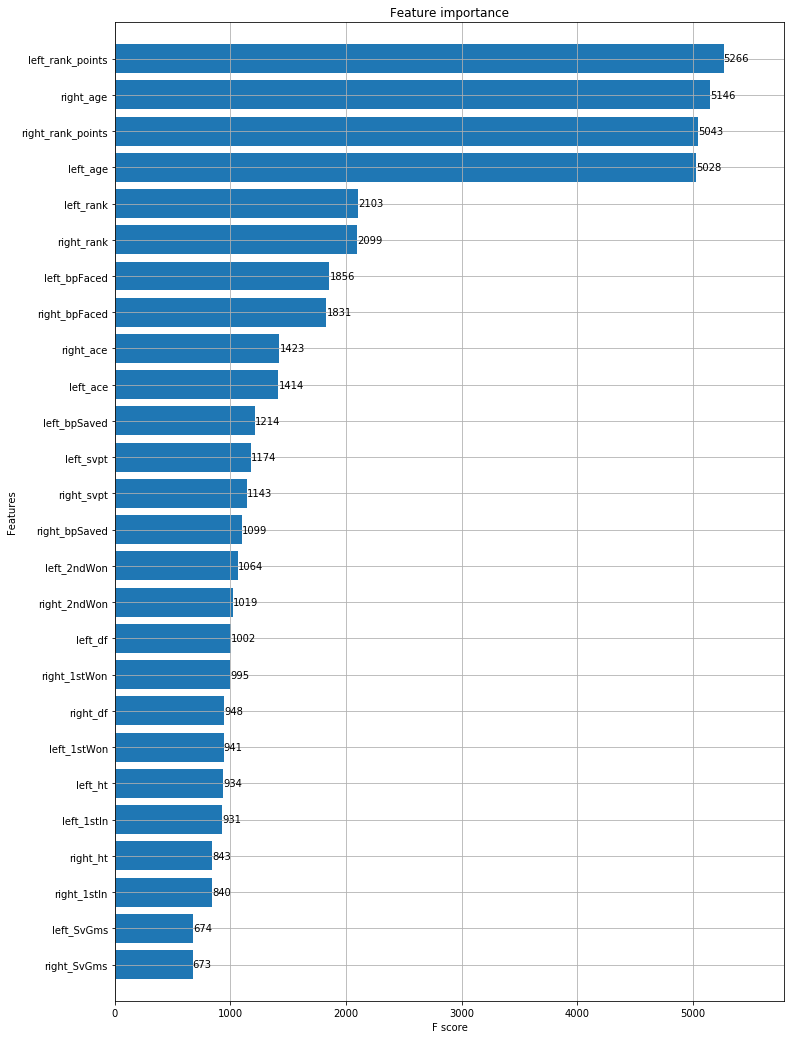

In [127]:
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(clf, max_num_features=50, height=0.8, ax=ax)
tree = xgb.to_graphviz(clf)
plt.show()

In [ ]:
df

In [9]:
df['1st_diff'] = df['left_1stWon'] - df['right_1stWon']

In [10]:
df['ace_diff'] = df['left_ace'] - df['right_ace']

In [11]:
df['left_bpercent'] = df['left_bpSaved']/df['left_bpFaced']
df['rightt_bpercent'] = df['right_bpSaved']/df['right_bpFaced']